#### A model that includes only climate data, without data on number of infections in previous weeks.

In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sweetviz as sv

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#import table from SQL
#-------------------------

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-MLT0SLQ\SQLEXPRESS;'
                      'Database=Dengue;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()
df = pd.read_sql_query('SELECT * FROM final_ff_t12_X order by city_name, weekofyear',conn)
df.head()

,city_name,weekofyear,week,altitude,city_dens,max_temp_t-2,min_temp_t-2,DTR_t-2,BR_maxT_t-2,BR_minT_t-2,BR_t-2,rain_log_t-2,dew_point_t-2,sea_level_pressure_t-2,avg_humidity_t-2,min_humidity_t-2,Gust_t-2,avg_wind_t-2,max_temp_t-4,min_temp_t-4,DTR_t-4,BR_maxT_t-4,BR_minT_t-4,BR_t-4,rain_log_t-4,dew_point_t-4,sea_level_pressure_t-4,avg_humidity_t-4,min_humidity_t-4,Gust_t-4,avg_wind_t-4,max_temp_t-6,min_temp_t-6,DTR_t-6,BR_maxT_t-6,BR_minT_t-6,BR_t-6,rain_log_t-6,dew_point_t-6,sea_level_pressure_t-6,avg_humidity_t-6,min_humidity_t-6,Gust_t-6,avg_wind_t-6,max_temp_t-8,min_temp_t-8,DTR_t-8,BR_maxT_t-8,BR_minT_t-8,BR_t-8,rain_log_t-8,dew_point_t-8,sea_level_pressure_t-8,avg_humidity_t-8,min_humidity_t-8,Gust_t-8,avg_wind_t-8,max_temp_t-10,min_temp_t-10,DTR_t-10,BR_maxT_t-10,BR_minT_t-10,BR_t-10,rain_log_t-10,dew_point_t-10,sea_level_pressure_t-10,avg_humidity_t-10,min_humidity_t-10,Gust_t-10,avg_wind_t-10,max_temp_t-12,min_temp_t-12,DTR_t-12,BR_maxT_t-12,BR_minT_t-12,BR_t-12,rain_log_t-12,dew_point_t-12,sea_level_pressure_t-12,avg_humidity_t-12,min_humidity_t-12,Gust_t-12,avg_wind_t-12,Dengue_cases_t-12,non_Dengue_cases_t-12,Dengue_cases
0,Coronel_Pacheco,201242,42,411.14,23.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Coronel_Pacheco,201243,43,411.14,23.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Coronel_Pacheco,201244,44,411.14,23.5,30.500000,17.385000,13.115000,3.0,2.0,5.0,1.363236,16.820833,1012.522052,73.302083,40.250000,9.975000,1.661458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Coronel_Pacheco,201245,45,411.14,23.5,33.800000,18.942857,14.857143,3.0,2.0,5.0,0.414973,17.675595,1010.251046,67.529762,32.857143,8.271429,1.630357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Coronel_Pacheco,201246,46,411.14,23.5,30.942857,19.542857,11.400000,3.0,2.0,5.0,1.318063,18.796429,1008.971495,75.940476,49.285714,9.828571,1.503571,30.5,17.385,13.115,3.0,2.0,5.0,1.363236,16.820833,1012.522052,73.302083,40.25,9.975,1.661458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# Lag operation created NaN values
# drop rows with NaNs
df.dropna(how = 'any', inplace = True)


In [5]:
df.isnull().sum()

city_name                0
weekofyear               0
week                     0
altitude                 0
city_dens                0
                        ..
Gust_t-12                0
avg_wind_t-12            0
Dengue_cases_t-12        0
non_Dengue_cases_t-12    0
Dengue_cases             0
Length: 86, dtype: int64

In [6]:
df.shape

(1970, 86)

In [7]:
df.head()

,city_name,weekofyear,week,altitude,city_dens,max_temp_t-2,min_temp_t-2,DTR_t-2,BR_maxT_t-2,BR_minT_t-2,BR_t-2,rain_log_t-2,dew_point_t-2,sea_level_pressure_t-2,avg_humidity_t-2,min_humidity_t-2,Gust_t-2,avg_wind_t-2,max_temp_t-4,min_temp_t-4,DTR_t-4,BR_maxT_t-4,BR_minT_t-4,BR_t-4,rain_log_t-4,dew_point_t-4,sea_level_pressure_t-4,avg_humidity_t-4,min_humidity_t-4,Gust_t-4,avg_wind_t-4,max_temp_t-6,min_temp_t-6,DTR_t-6,BR_maxT_t-6,BR_minT_t-6,BR_t-6,rain_log_t-6,dew_point_t-6,sea_level_pressure_t-6,avg_humidity_t-6,min_humidity_t-6,Gust_t-6,avg_wind_t-6,max_temp_t-8,min_temp_t-8,DTR_t-8,BR_maxT_t-8,BR_minT_t-8,BR_t-8,rain_log_t-8,dew_point_t-8,sea_level_pressure_t-8,avg_humidity_t-8,min_humidity_t-8,Gust_t-8,avg_wind_t-8,max_temp_t-10,min_temp_t-10,DTR_t-10,BR_maxT_t-10,BR_minT_t-10,BR_t-10,rain_log_t-10,dew_point_t-10,sea_level_pressure_t-10,avg_humidity_t-10,min_humidity_t-10,Gust_t-10,avg_wind_t-10,max_temp_t-12,min_temp_t-12,DTR_t-12,BR_maxT_t-12,BR_minT_t-12,BR_t-12,rain_log_t-12,dew_point_t-12,sea_level_pressure_t-12,avg_humidity_t-12,min_humidity_t-12,Gust_t-12,avg_wind_t-12,Dengue_cases_t-12,non_Dengue_cases_t-12,Dengue_cases
12,Coronel_Pacheco,201302,2,411.14,23.5,33.242857,19.557143,13.685714,3.0,2.0,5.0,1.033424,19.814286,1010.120019,74.041667,40.000000,8.785714,1.600595,31.600000,20.985714,10.614286,3.0,2.0,5.0,1.946452,21.239286,1007.250784,83.720238,53.571429,11.285714,1.392857,28.642857,19.271429,9.371429,3.0,2.0,5.0,1.846337,19.186309,1010.565401,81.547619,54.428571,8.671429,1.590476,26.542857,17.485714,9.057143,3.0,2.0,5.0,2.043755,17.506548,1011.311306,82.226190,57.285714,7.157143,1.369048,30.942857,19.542857,11.400000,3.0,2.0,5.0,1.318063,18.796429,1008.971495,75.940476,49.285714,9.828571,1.503571,30.500000,17.385000,13.115000,3.0,2.0,5.0,1.363236,16.820833,1012.522052,73.302083,40.250000,9.975000,1.661458,0.0,0.0,0
13,Coronel_Pacheco,201303,3,411.14,23.5,31.828571,19.771429,12.057143,3.0,2.0,5.0,1.209515,19.352381,1012.447704,73.494048,41.428571,7.028571,1.579167,32.428571,20.428571,12.000000,3.0,2.0,5.0,1.113943,20.659524,1009.404145,77.773810,45.714286,8.857143,1.450595,32.157143,20.285714,11.871429,3.0,2.0,5.0,1.428135,20.267262,1009.869249,76.744048,45.142857,8.785714,1.567262,28.585714,18.314286,10.271429,3.0,2.0,5.0,1.570543,18.238095,1010.562545,78.940476,52.428571,7.285714,1.297619,27.257143,19.400000,7.857143,3.0,2.0,5.0,2.063709,18.836310,1010.552646,81.071429,59.142857,8.442857,1.662500,33.800000,18.942857,14.857143,3.0,2.0,5.0,0.414973,17.675595,1010.251046,67.529762,32.857143,8.271429,1.630357,0.0,0.0,0
14,Coronel_Pacheco,201304,4,411.14,23.5,28.700000,20.257143,8.442857,3.0,2.0,5.0,1.828660,19.841667,1010.336466,82.452381,57.285714,8.757143,1.429167,33.242857,19.557143,13.685714,3.0,2.0,5.0,1.033424,19.814286,1010.120019,74.041667,40.000000,8.785714,1.600595,31.600000,20.985714,10.614286,3.0,2.0,5.0,1.946452,21.239286,1007.250784,83.720238,53.571429,11.285714,1.392857,28.642857,19.271429,9.371429,3.0,2.0,5.0,1.846337,19.186309,1010.565401,81.547619,54.428571,8.671429,1.590476,26.542857,17.485714,9.057143,3.0,2.0,5.0,2.043755,17.506548,1011.311306,82.226190,57.285714,7.157143,1.369048,30.942857,19.542857,11.400000,3.0,2.0,5.0,1.318063,18.796429,1008.971495,75.940476,49.285714,9.828571,1.503571,0.0,0.0,0
15,Coronel_Pacheco,201305,5,411.14,23.5,29.914286,19.914286,10.000000,3.0,2.0,5.0,1.846337,20.057143,1008.920131,84.500000,55.000000,9.985714,1.408333,31.828571,19.771429,12.057143,3.0,2.0,5.0,1.209515,19.352381,1012.447704,73.494048,41.428571,7.028571,1.579167,32.428571,20.428571,12.000000,3.0,2.0,5.0,1.113943,20.659524,1009.404145,77.773810,45.714286,8.857143,1.450595,32.157143,20.285714,11.871429,3.0,2.0,5.0,1.428135,20.267262,1009.869249,76.744048,45.142857,8.785714,1.567262,28.585714,18.314286,10.271429,3.0,2.0,5.0,1.570543,18.238095,1010.562545,78.940476,52.428571,7.285714,1.297619,27.257143,19.400000,7.857143,3.0,2.0,5.0,2.063709,18.836310,1010.552646,81.071429,59.142857,8.442857,1.662500,

### Correlation matrix
<br>Test for correlations between lagged variables

In [8]:
corrMatrix = df.corr(method = 'spearman')
corrMatrix.style.background_gradient(cmap='coolwarm')

### Correlations between Lagged variables (t-2 and t-4):

Text(0.5, 1.0, 'Wind (avg), rho=0.900')

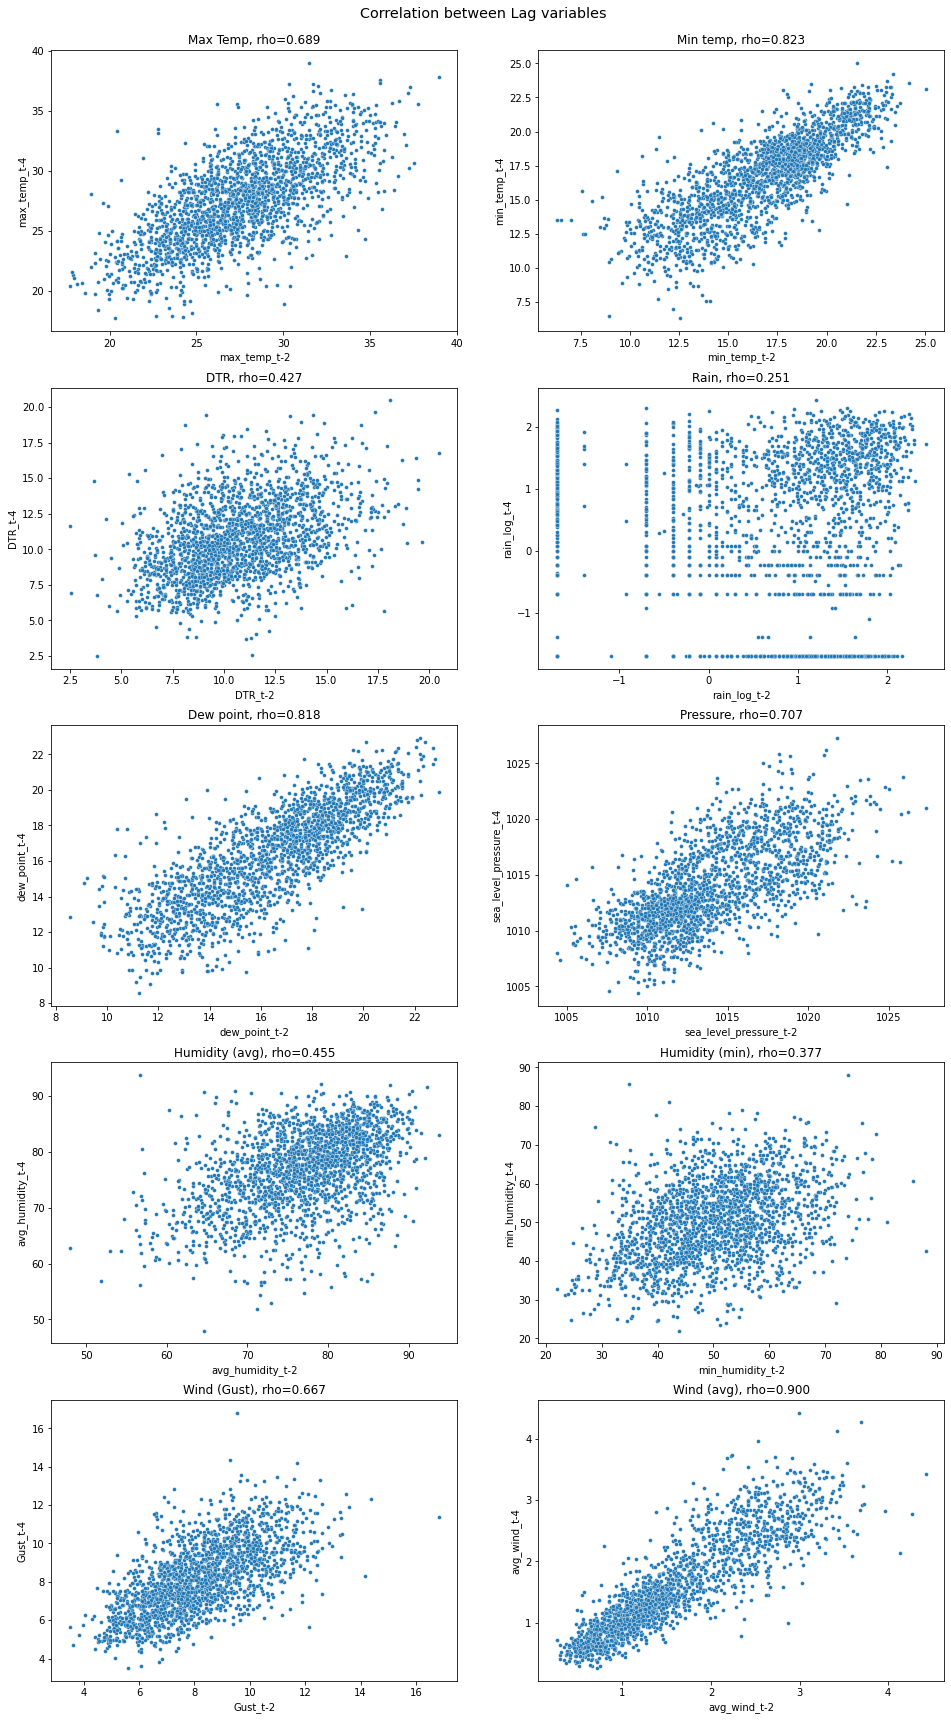

In [9]:
fig, axes = plt.subplots(5,2, figsize = (16,30))
fig.suptitle('Correlation between Lag variables', y= 0.9, fontsize =  'x-large')
sns.scatterplot(x= 'max_temp_t-2', y= 'max_temp_t-4', data = df,  s=15, ax= axes[0,0])
axes[0,0].set_title("Max Temp, rho=0.689")
sns.scatterplot(x="min_temp_t-2", y= "min_temp_t-4", data = df, s=15, ax= axes[0,1])
axes[0,1].set_title("Min temp, rho=0.823")
sns.scatterplot(x="DTR_t-2", y= "DTR_t-4", data = df, s=15, ax= axes[1,0])
axes[1,0].set_title("DTR, rho=0.427")
sns.scatterplot(x="rain_log_t-2", y= "rain_log_t-4", data = df, s=15, ax= axes[1,1])
axes[1,1].set_title("Rain, rho=0.251")
sns.scatterplot(x="dew_point_t-2", y= "dew_point_t-4", data = df,s=15,  ax= axes[2,0])
axes[2,0].set_title("Dew point, rho=0.818")
sns.scatterplot(x="sea_level_pressure_t-2", y= "sea_level_pressure_t-4", data = df,s=15, ax= axes[2,1])
axes[2,1].set_title("Pressure, rho=0.707")
sns.scatterplot(x="avg_humidity_t-2", y= "avg_humidity_t-4", data = df, s=15, ax= axes[3,0])
axes[3,0].set_title("Humidity (avg), rho=0.455")
sns.scatterplot(x="min_humidity_t-2", y= "min_humidity_t-4", data = df, s=15, ax= axes[3,1])
axes[3,1].set_title("Humidity (min), rho=0.377")
sns.scatterplot(x="Gust_t-2", y= "Gust_t-4", data = df, s=15, ax= axes[4,0])
axes[4,0].set_title("Wind (Gust), rho=0.667")
sns.scatterplot(x="avg_wind_t-2", y= "avg_wind_t-4", data = df, s=15, ax= axes[4,1])
axes[4,1].set_title("Wind (avg), rho=0.900")

High correlations (>0.7) for variables:
<br> Min temperature
<br> Dew point
<br> Atmospheric pressure
<br> Average wind speed


In [11]:
list_of_col = list(df.columns) 

# Min temperature
min_temp = []
for col in list_of_col:
    if "min_temp" in col:
        min_temp.append(col)

min_temp_df = df[min_temp]

min_temp_corr = min_temp_df.corr(method = 'spearman')
min_temp_corr.style.background_gradient(cmap='coolwarm')

,min_temp_t-2,min_temp_t-4,min_temp_t-6,min_temp_t-8,min_temp_t-10,min_temp_t-12
min_temp_t-2,1.000000,0.823166,0.743333,0.659217,0.521292,0.380533
min_temp_t-4,0.823166,1.000000,0.823658,0.742152,0.657928,0.520831
min_temp_t-6,0.743333,0.823658,1.000000,0.823215,0.742301,0.657999
min_temp_t-8,0.659217,0.742152,0.823215,1.000000,0.822738,0.742052
min_temp_t-10,0.521292,0.657928,0.742301,0.822738,1.000000,0.822815
min_temp_t-12,0.380533,0.520831,0.657999,0.742052,0.822815,1.000000


In [12]:
# keep only min_temp_t-2 and in_temp_t-12

df.drop(columns = ['min_temp_t-4', 'min_temp_t-6', 'min_temp_t-8', 'min_temp_t-10'] , inplace = True)

In [13]:
# Dew point
dew_point = []
for col in list_of_col:
    if "dew_point" in col:
        dew_point.append(col)

dew_point_df = df[dew_point]

dew_point_corr = dew_point_df.corr(method = 'spearman')
dew_point_corr.style.background_gradient(cmap='coolwarm')

,dew_point_t-2,dew_point_t-4,dew_point_t-6,dew_point_t-8,dew_point_t-10,dew_point_t-12
dew_point_t-2,1.000000,0.818181,0.729023,0.635559,0.498708,0.372371
dew_point_t-4,0.818181,1.000000,0.817890,0.727365,0.633988,0.499046
dew_point_t-6,0.729023,0.817890,1.000000,0.817427,0.727218,0.634783
dew_point_t-8,0.635559,0.727365,0.817427,1.000000,0.816947,0.728240
dew_point_t-10,0.498708,0.633988,0.727218,0.816947,1.000000,0.817865
dew_point_t-12,0.372371,0.499046,0.634783,0.728240,0.817865,1.000000


In [14]:
#Keep only dew_point_t-8

df.drop(columns = ['dew_point_t-2', 'dew_point_t-4', 'dew_point_t-6', 'dew_point_t-10', 'dew_point_t-12'] , inplace = True)

In [15]:
# Average wind
avg_wind = []
for col in list_of_col:
    if "avg_wind" in col:
        avg_wind.append(col)

avg_wind_df = df[avg_wind]

avg_wind_corr = avg_wind_df.corr(method = 'spearman')
avg_wind_corr.style.background_gradient(cmap='coolwarm')

,avg_wind_t-2,avg_wind_t-4,avg_wind_t-6,avg_wind_t-8,avg_wind_t-10,avg_wind_t-12
avg_wind_t-2,1.000000,0.900351,0.884423,0.862266,0.839415,0.810912
avg_wind_t-4,0.900351,1.000000,0.900495,0.884559,0.862483,0.839414
avg_wind_t-6,0.884423,0.900495,1.000000,0.900146,0.884365,0.862004
avg_wind_t-8,0.862266,0.884559,0.900146,1.000000,0.899659,0.883538
avg_wind_t-10,0.839415,0.862483,0.884365,0.899659,1.000000,0.898922
avg_wind_t-12,0.810912,0.839414,0.862004,0.883538,0.898922,1.000000


In [16]:
# Keep only avg_wind_t-6

df.drop(columns = ['avg_wind_t-2', 'avg_wind_t-4', 'avg_wind_t-8', 'avg_wind_t-10', 'avg_wind_t-12'] , inplace = True)

In [58]:
# pressure
pressure = []
for col in list_of_col:
    if "pressure" in col:
        pressure.append(col)

pressure_df = df[pressure]

pressure_corr = pressure_df.corr(method = 'spearman')
pressure_corr.style.background_gradient(cmap='coolwarm')

,sea_level_pressure_t-2,sea_level_pressure_t-4,sea_level_pressure_t-6,sea_level_pressure_t-8,sea_level_pressure_t-10,sea_level_pressure_t-12
sea_level_pressure_t-2,1.000000,0.707481,0.641390,0.549421,0.416629,0.257874
sea_level_pressure_t-4,0.707481,1.000000,0.706774,0.641243,0.548506,0.418385
sea_level_pressure_t-6,0.641390,0.706774,1.000000,0.706319,0.638006,0.548698
sea_level_pressure_t-8,0.549421,0.641243,0.706319,1.000000,0.705485,0.638783
sea_level_pressure_t-10,0.416629,0.548506,0.638006,0.705485,1.000000,0.703926
sea_level_pressure_t-12,0.257874,0.418385,0.548698,0.638783,0.703926,1.000000


In [59]:
# keep only sea_level_pressure_t-2 , sea_level_pressure_t-8, sea_level_pressure_t-12

df.drop(columns = ['sea_level_pressure_t-4', 'sea_level_pressure_t-6', 'sea_level_pressure_t-10'] , inplace = True)

In [60]:
df.shape

(1970, 65)

In [61]:
df.head()

,week,altitude,city_dens,max_temp_t-2,min_temp_t-2,DTR_t-2,BR_maxT_t-2,BR_minT_t-2,BR_t-2,rain_log_t-2,sea_level_pressure_t-2,avg_humidity_t-2,min_humidity_t-2,Gust_t-2,max_temp_t-4,DTR_t-4,BR_maxT_t-4,BR_minT_t-4,BR_t-4,rain_log_t-4,avg_humidity_t-4,min_humidity_t-4,Gust_t-4,max_temp_t-6,DTR_t-6,BR_maxT_t-6,BR_minT_t-6,BR_t-6,rain_log_t-6,avg_humidity_t-6,min_humidity_t-6,Gust_t-6,avg_wind_t-6,max_temp_t-8,DTR_t-8,BR_maxT_t-8,BR_minT_t-8,BR_t-8,rain_log_t-8,dew_point_t-8,sea_level_pressure_t-8,avg_humidity_t-8,min_humidity_t-8,Gust_t-8,max_temp_t-10,DTR_t-10,BR_maxT_t-10,BR_minT_t-10,BR_t-10,rain_log_t-10,avg_humidity_t-10,min_humidity_t-10,Gust_t-10,max_temp_t-12,min_temp_t-12,DTR_t-12,BR_maxT_t-12,BR_minT_t-12,BR_t-12,rain_log_t-12,sea_level_pressure_t-12,avg_humidity_t-12,min_humidity_t-12,Gust_t-12,Dengue_cases
12,2,411.14,23.5,33.242857,19.557143,13.685714,3.0,2.0,5.0,1.033424,1010.120019,74.041667,40.000000,8.785714,31.600000,10.614286,3.0,2.0,5.0,1.946452,83.720238,53.571429,11.285714,28.642857,9.371429,3.0,2.0,5.0,1.846337,81.547619,54.428571,8.671429,1.590476,26.542857,9.057143,3.0,2.0,5.0,2.043755,17.506548,1011.311306,82.226190,57.285714,7.157143,30.942857,11.400000,3.0,2.0,5.0,1.318063,75.940476,49.285714,9.828571,30.500000,17.385000,13.115000,3.0,2.0,5.0,1.363236,1012.522052,73.302083,40.250000,9.975000,0
13,3,411.14,23.5,31.828571,19.771429,12.057143,3.0,2.0,5.0,1.209515,1012.447704,73.494048,41.428571,7.028571,32.428571,12.000000,3.0,2.0,5.0,1.113943,77.773810,45.714286,8.857143,32.157143,11.871429,3.0,2.0,5.0,1.428135,76.744048,45.142857,8.785714,1.567262,28.585714,10.271429,3.0,2.0,5.0,1.570543,18.238095,1010.562545,78.940476,52.428571,7.285714,27.257143,7.857143,3.0,2.0,5.0,2.063709,81.071429,59.142857,8.442857,33.800000,18.942857,14.857143,3.0,2.0,5.0,0.414973,1010.251046,67.529762,32.857143,8.271429,0
14,4,411.14,23.5,28.700000,20.257143,8.442857,3.0,2.0,5.0,1.828660,1010.336466,82.452381,57.285714,8.757143,33.242857,13.685714,3.0,2.0,5.0,1.033424,74.041667,40.000000,8.785714,31.600000,10.614286,3.0,2.0,5.0,1.946452,83.720238,53.571429,11.285714,1.392857,28.642857,9.371429,3.0,2.0,5.0,1.846337,19.186309,1010.565401,81.547619,54.428571,8.671429,26.542857,9.057143,3.0,2.0,5.0,2.043755,82.226190,57.285714,7.157143,30.942857,19.542857,11.400000,3.0,2.0,5.0,1.318063,1008.971495,75.940476,49.285714,9.828571,0
15,5,411.14,23.5,29.914286,19.914286,10.000000,3.0,2.0,5.0,1.846337,1008.920131,84.500000,55.000000,9.985714,31.828571,12.057143,3.0,2.0,5.0,1.209515,73.494048,41.428571,7.028571,32.428571,12.000000,3.0,2.0,5.0,1.113943,77.773810,45.714286,8.857143,1.450595,32.157143,11.871429,3.0,2.0,5.0,1.428135,20.267262,1009.869249,76.744048,45.142857,8.785714,28.585714,10.271429,3.0,2.0,5.0,1.570543,78.940476,52.428571,7.285714,27.257143,19.400000,7.857143,3.0,2.0,5.0,2.063709,1010.552646,81.071429,59.142857,8.442857,0
16,6,411.14,23.5,28.842857,19.571429,9.271429,3.0,2.0,5.0,1.193125,1011.259805,82.136905,57.000000,8.328571,28.700000,8.442857,3.0,2.0,5.0,1.828660,82.452381,57.285714,8.757143,33.242857,13.685714,3.0,2.0,5.0,1.033424,74.041667,40.000000,8.785714,1.600595,31.600000,10.614286,3.0,2.0,5.0,1.946452,21.239286,1007.250784,83.720238,53.571429,11.285714,28.642857,9.371429,3.0,2.0,5.0,1.846337,81.547619,54.428571,8.671429,26.542857,17.485714,9.057143,3.0,2.0,5.0,2.043755,1011.311306,82.226190,57.285714,7.157143,0


--------
## Feature Selection

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR

In [20]:
# arrange dataframe: leave only relevant columns for feature selection
# city name is represented by city_des and altitude
# weekofyear includes information on the year,this information cannot be used for future predictions therefore is excluded
# This model includes only climate information, therefore will not use information on previous infection numbers

df.drop(columns=['city_name', 'weekofyear','Dengue_cases_t-12', 'non_Dengue_cases_t-12'], inplace = True)

df.head()

,week,altitude,city_dens,max_temp_t-2,min_temp_t-2,DTR_t-2,BR_maxT_t-2,BR_minT_t-2,BR_t-2,rain_log_t-2,sea_level_pressure_t-2,avg_humidity_t-2,min_humidity_t-2,Gust_t-2,max_temp_t-4,DTR_t-4,BR_maxT_t-4,BR_minT_t-4,BR_t-4,rain_log_t-4,sea_level_pressure_t-4,avg_humidity_t-4,min_humidity_t-4,Gust_t-4,max_temp_t-6,DTR_t-6,BR_maxT_t-6,BR_minT_t-6,BR_t-6,rain_log_t-6,sea_level_pressure_t-6,avg_humidity_t-6,min_humidity_t-6,Gust_t-6,avg_wind_t-6,max_temp_t-8,DTR_t-8,BR_maxT_t-8,BR_minT_t-8,BR_t-8,rain_log_t-8,dew_point_t-8,sea_level_pressure_t-8,avg_humidity_t-8,min_humidity_t-8,Gust_t-8,max_temp_t-10,DTR_t-10,BR_maxT_t-10,BR_minT_t-10,BR_t-10,rain_log_t-10,sea_level_pressure_t-10,avg_humidity_t-10,min_humidity_t-10,Gust_t-10,max_temp_t-12,min_temp_t-12,DTR_t-12,BR_maxT_t-12,BR_minT_t-12,BR_t-12,rain_log_t-12,sea_level_pressure_t-12,avg_humidity_t-12,min_humidity_t-12,Gust_t-12,Dengue_cases
12,2,411.14,23.5,33.242857,19.557143,13.685714,3.0,2.0,5.0,1.033424,1010.120019,74.041667,40.000000,8.785714,31.600000,10.614286,3.0,2.0,5.0,1.946452,1007.250784,83.720238,53.571429,11.285714,28.642857,9.371429,3.0,2.0,5.0,1.846337,1010.565401,81.547619,54.428571,8.671429,1.590476,26.542857,9.057143,3.0,2.0,5.0,2.043755,17.506548,1011.311306,82.226190,57.285714,7.157143,30.942857,11.400000,3.0,2.0,5.0,1.318063,1008.971495,75.940476,49.285714,9.828571,30.500000,17.385000,13.115000,3.0,2.0,5.0,1.363236,1012.522052,73.302083,40.250000,9.975000,0
13,3,411.14,23.5,31.828571,19.771429,12.057143,3.0,2.0,5.0,1.209515,1012.447704,73.494048,41.428571,7.028571,32.428571,12.000000,3.0,2.0,5.0,1.113943,1009.404145,77.773810,45.714286,8.857143,32.157143,11.871429,3.0,2.0,5.0,1.428135,1009.869249,76.744048,45.142857,8.785714,1.567262,28.585714,10.271429,3.0,2.0,5.0,1.570543,18.238095,1010.562545,78.940476,52.428571,7.285714,27.257143,7.857143,3.0,2.0,5.0,2.063709,1010.552646,81.071429,59.142857,8.442857,33.800000,18.942857,14.857143,3.0,2.0,5.0,0.414973,1010.251046,67.529762,32.857143,8.271429,0
14,4,411.14,23.5,28.700000,20.257143,8.442857,3.0,2.0,5.0,1.828660,1010.336466,82.452381,57.285714,8.757143,33.242857,13.685714,3.0,2.0,5.0,1.033424,1010.120019,74.041667,40.000000,8.785714,31.600000,10.614286,3.0,2.0,5.0,1.946452,1007.250784,83.720238,53.571429,11.285714,1.392857,28.642857,9.371429,3.0,2.0,5.0,1.846337,19.186309,1010.565401,81.547619,54.428571,8.671429,26.542857,9.057143,3.0,2.0,5.0,2.043755,1011.311306,82.226190,57.285714,7.157143,30.942857,19.542857,11.400000,3.0,2.0,5.0,1.318063,1008.971495,75.940476,49.285714,9.828571,0
15,5,411.14,23.5,29.914286,19.914286,10.000000,3.0,2.0,5.0,1.846337,1008.920131,84.500000,55.000000,9.985714,31.828571,12.057143,3.0,2.0,5.0,1.209515,1012.447704,73.494048,41.428571,7.028571,32.428571,12.000000,3.0,2.0,5.0,1.113943,1009.404145,77.773810,45.714286,8.857143,1.450595,32.157143,11.871429,3.0,2.0,5.0,1.428135,20.267262,1009.869249,76.744048,45.142857,8.785714,28.585714,10.271429,3.0,2.0,5.0,1.570543,1010.562545,78.940476,52.428571,7.285714,27.257143,19.400000,7.857143,3.0,2.0,5.0,2.063709,1010.552646,81.071429,59.142857,8.442857,0
16,6,411.14,23.5,28.842857,19.571429,9.271429,3.0,2.0,5.0,1.193125,1011.259805,82.136905,57.000000,8.328571,28.700000,8.442857,3.0,2.0,5.0,1.828660,1010.336466,82.452381,57.285714,8.757143,33.242857,13.685714,3.0,2.0,5.0,1.033424,1010.120019,74.041667,40.000000,8.785714,1.600595,31.600000,10.614286,3.0,2.0,5.0,1.946452,21.239286,1007.250784,83.720238,53.571429,11.285714,28.642857,9.371429,3.0,2.0,5.0,1.846337,1010.565401,81.547619,54.428571,8.671429,26.542857,17.485714,9.057143,3.0,2.0,5.0,2.043755,1011.311306,82.226190,57.285714,7.157143,0


In [62]:
X = df.iloc[:,:-1]
X.head()

,week,altitude,city_dens,max_temp_t-2,min_temp_t-2,DTR_t-2,BR_maxT_t-2,BR_minT_t-2,BR_t-2,rain_log_t-2,sea_level_pressure_t-2,avg_humidity_t-2,min_humidity_t-2,Gust_t-2,max_temp_t-4,DTR_t-4,BR_maxT_t-4,BR_minT_t-4,BR_t-4,rain_log_t-4,avg_humidity_t-4,min_humidity_t-4,Gust_t-4,max_temp_t-6,DTR_t-6,BR_maxT_t-6,BR_minT_t-6,BR_t-6,rain_log_t-6,avg_humidity_t-6,min_humidity_t-6,Gust_t-6,avg_wind_t-6,max_temp_t-8,DTR_t-8,BR_maxT_t-8,BR_minT_t-8,BR_t-8,rain_log_t-8,dew_point_t-8,sea_level_pressure_t-8,avg_humidity_t-8,min_humidity_t-8,Gust_t-8,max_temp_t-10,DTR_t-10,BR_maxT_t-10,BR_minT_t-10,BR_t-10,rain_log_t-10,avg_humidity_t-10,min_humidity_t-10,Gust_t-10,max_temp_t-12,min_temp_t-12,DTR_t-12,BR_maxT_t-12,BR_minT_t-12,BR_t-12,rain_log_t-12,sea_level_pressure_t-12,avg_humidity_t-12,min_humidity_t-12,Gust_t-12
12,2,411.14,23.5,33.242857,19.557143,13.685714,3.0,2.0,5.0,1.033424,1010.120019,74.041667,40.000000,8.785714,31.600000,10.614286,3.0,2.0,5.0,1.946452,83.720238,53.571429,11.285714,28.642857,9.371429,3.0,2.0,5.0,1.846337,81.547619,54.428571,8.671429,1.590476,26.542857,9.057143,3.0,2.0,5.0,2.043755,17.506548,1011.311306,82.226190,57.285714,7.157143,30.942857,11.400000,3.0,2.0,5.0,1.318063,75.940476,49.285714,9.828571,30.500000,17.385000,13.115000,3.0,2.0,5.0,1.363236,1012.522052,73.302083,40.250000,9.975000
13,3,411.14,23.5,31.828571,19.771429,12.057143,3.0,2.0,5.0,1.209515,1012.447704,73.494048,41.428571,7.028571,32.428571,12.000000,3.0,2.0,5.0,1.113943,77.773810,45.714286,8.857143,32.157143,11.871429,3.0,2.0,5.0,1.428135,76.744048,45.142857,8.785714,1.567262,28.585714,10.271429,3.0,2.0,5.0,1.570543,18.238095,1010.562545,78.940476,52.428571,7.285714,27.257143,7.857143,3.0,2.0,5.0,2.063709,81.071429,59.142857,8.442857,33.800000,18.942857,14.857143,3.0,2.0,5.0,0.414973,1010.251046,67.529762,32.857143,8.271429
14,4,411.14,23.5,28.700000,20.257143,8.442857,3.0,2.0,5.0,1.828660,1010.336466,82.452381,57.285714,8.757143,33.242857,13.685714,3.0,2.0,5.0,1.033424,74.041667,40.000000,8.785714,31.600000,10.614286,3.0,2.0,5.0,1.946452,83.720238,53.571429,11.285714,1.392857,28.642857,9.371429,3.0,2.0,5.0,1.846337,19.186309,1010.565401,81.547619,54.428571,8.671429,26.542857,9.057143,3.0,2.0,5.0,2.043755,82.226190,57.285714,7.157143,30.942857,19.542857,11.400000,3.0,2.0,5.0,1.318063,1008.971495,75.940476,49.285714,9.828571
15,5,411.14,23.5,29.914286,19.914286,10.000000,3.0,2.0,5.0,1.846337,1008.920131,84.500000,55.000000,9.985714,31.828571,12.057143,3.0,2.0,5.0,1.209515,73.494048,41.428571,7.028571,32.428571,12.000000,3.0,2.0,5.0,1.113943,77.773810,45.714286,8.857143,1.450595,32.157143,11.871429,3.0,2.0,5.0,1.428135,20.267262,1009.869249,76.744048,45.142857,8.785714,28.585714,10.271429,3.0,2.0,5.0,1.570543,78.940476,52.428571,7.285714,27.257143,19.400000,7.857143,3.0,2.0,5.0,2.063709,1010.552646,81.071429,59.142857,8.442857
16,6,411.14,23.5,28.842857,19.571429,9.271429,3.0,2.0,5.0,1.193125,1011.259805,82.136905,57.000000,8.328571,28.700000,8.442857,3.0,2.0,5.0,1.828660,82.452381,57.285714,8.757143,33.242857,13.685714,3.0,2.0,5.0,1.033424,74.041667,40.000000,8.785714,1.600595,31.600000,10.614286,3.0,2.0,5.0,1.946452,21.239286,1007.250784,83.720238,53.571429,11.285714,28.642857,9.371429,3.0,2.0,5.0,1.846337,81.547619,54.428571,8.671429,26.542857,17.485714,9.057143,3.0,2.0,5.0,2.043755,1011.311306,82.226190,57.285714,7.157143


In [63]:
y = df.iloc[:,-1:]
y

,Dengue_cases
12,0
13,0
14,0
15,0
16,0
...,...
2025,0
2026,0
2027,0
2028,0


In [64]:
# Normalize data

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
scale_df = pd.DataFrame( data = X_scale, columns= list(X.columns), index= df.index)
scale_df.head()

,week,altitude,city_dens,max_temp_t-2,min_temp_t-2,DTR_t-2,BR_maxT_t-2,BR_minT_t-2,BR_t-2,rain_log_t-2,sea_level_pressure_t-2,avg_humidity_t-2,min_humidity_t-2,Gust_t-2,max_temp_t-4,DTR_t-4,BR_maxT_t-4,BR_minT_t-4,BR_t-4,rain_log_t-4,avg_humidity_t-4,min_humidity_t-4,Gust_t-4,max_temp_t-6,DTR_t-6,BR_maxT_t-6,BR_minT_t-6,BR_t-6,rain_log_t-6,avg_humidity_t-6,min_humidity_t-6,Gust_t-6,avg_wind_t-6,max_temp_t-8,DTR_t-8,BR_maxT_t-8,BR_minT_t-8,BR_t-8,rain_log_t-8,dew_point_t-8,sea_level_pressure_t-8,avg_humidity_t-8,min_humidity_t-8,Gust_t-8,max_temp_t-10,DTR_t-10,BR_maxT_t-10,BR_minT_t-10,BR_t-10,rain_log_t-10,avg_humidity_t-10,min_humidity_t-10,Gust_t-10,max_temp_t-12,min_temp_t-12,DTR_t-12,BR_maxT_t-12,BR_minT_t-12,BR_t-12,rain_log_t-12,sea_level_pressure_t-12,avg_humidity_t-12,min_humidity_t-12,Gust_t-12
12,0.019231,0.196227,0.0,0.730511,0.707677,0.622417,1.0,0.666667,0.75,0.661132,0.250657,0.569501,0.272727,0.396570,0.653226,0.451510,1.0,0.666667,0.75,0.882050,0.781107,0.478355,0.584137,0.514113,0.382353,1.0,0.666667,0.75,0.857826,0.733606,0.491342,0.387996,0.319383,0.415323,0.364865,1.0,0.666667,0.75,0.905593,0.622212,0.302595,0.748442,0.534632,0.274384,0.622312,0.495231,1.0,0.666667,0.75,0.730004,0.611015,0.413420,0.474812,0.601478,0.591726,0.590660,1.0,0.666667,0.75,0.717383,0.406557,0.530878,0.264493,0.485798
13,0.038462,0.196227,0.0,0.663978,0.719115,0.531797,1.0,0.666667,0.75,0.703740,0.352141,0.557528,0.294372,0.264737,0.692204,0.528617,1.0,0.666667,0.75,0.680615,0.651098,0.359307,0.401929,0.679435,0.521463,1.0,0.666667,0.75,0.756637,0.628584,0.350649,0.396570,0.313812,0.511425,0.432432,1.0,0.666667,0.75,0.791094,0.673025,0.269950,0.676605,0.461039,0.284030,0.448925,0.298092,1.0,0.666667,0.75,0.910421,0.723195,0.562771,0.370847,0.756720,0.674886,0.687599,1.0,0.666667,0.75,0.495234,0.315404,0.409797,0.157350,0.357985
14,0.057692,0.196227,0.0,0.516801,0.745043,0.330684,1.0,0.666667,0.75,0.853548,0.260094,0.753387,0.534632,0.394427,0.730511,0.622417,1.0,0.666667,0.75,0.661132,0.569501,0.272727,0.396570,0.653226,0.451510,1.0,0.666667,0.75,0.882050,0.781107,0.478355,0.584137,0.271961,0.514113,0.382353,1.0,0.666667,0.75,0.857826,0.738889,0.270075,0.733606,0.491342,0.387996,0.415323,0.364865,1.0,0.666667,0.75,0.905593,0.748442,0.534632,0.274384,0.622312,0.706914,0.495231,1.0,0.666667,0.75,0.706801,0.264046,0.586221,0.395445,0.474812
15,0.076923,0.196227,0.0,0.573925,0.726741,0.417329,1.0,0.666667,0.75,0.857826,0.198343,0.798155,0.500000,0.486602,0.663978,0.531797,1.0,0.666667,0.75,0.703740,0.557528,0.294372,0.264737,0.692204,0.528617,1.0,0.666667,0.75,0.680615,0.651098,0.359307,0.401929,0.285816,0.679435,0.521463,1.0,0.666667,0.75,0.756637,0.813973,0.239723,0.628584,0.350649,0.396570,0.511425,0.432432,1.0,0.666667,0.75,0.791094,0.676605,0.461039,0.284030,0.448925,0.699288,0.298092,1.0,0.666667,0.75,0.881483,0.327509,0.693848,0.538302,0.370847
16,0.096154,0.196227,0.0,0.523522,0.708439,0.376789,1.0,0.666667,0.75,0.699774,0.300350,0.746490,0.530303,0.362272,0.516801,0.330684,1.0,0.666667,0.75,0.853548,0.753387,0.534632,0.394427,0.730511,0.622417,1.0,0.666667,0.75,0.661132,0.569501,0.272727,0.396570,0.321811,0.653226,0.451510,1.0,0.666667,0.75,0.882050,0.881490,0.125561,0.781107,0.478355,0.584137,0.514113,0.382353,1.0,0.666667,0.75,0.857826,0.733606,0.491342,0.387996,0.415323,0.597102,0.364865,1.0,0.666667,0.75,0.876808,0.357960,0.718071,0.511387,0.274384


### Univariate feature selection

In [24]:
# spearman rank
from scipy import stats

In [65]:
varSel = pd.DataFrame({'Variable': X.columns})
varSel.head()

,Variable
0,week
1,altitude
2,city_dens
3,max_temp_t-2
4,min_temp_t-2


In [66]:
list_of_col = list(X.columns)

In [67]:
coef_list = []
p_list = []

for col in list_of_col:
    coef, p = stats.spearmanr(scale_df[col], y)
    coef_list.append(coef)
    p_list.append(p)
    
    

In [68]:
varSel['Spearman'] = coef_list
varSel['p_value'] = p_list
varSel.head()

,Variable,Spearman,p_value
0,week,-0.211429,2.407624e-21
1,altitude,0.246146,1.415285e-28
2,city_dens,0.342902,1.826898e-55
3,max_temp_t-2,-0.083758,1.978417e-04
4,min_temp_t-2,0.122672,4.708980e-08


In [69]:
pd.set_option("display.max_rows", 88)

In [70]:
varSel['Univarable'] = 0
varSel.loc[varSel['p_value']< 0.05, 'Univarable'] = 1

varSel.sort_values("Variable")

,Variable,Spearman,p_value,Univarable
46,BR_maxT_t-10,0.022567,3.167693e-01,0
56,BR_maxT_t-12,0.023084,3.058014e-01,0
6,BR_maxT_t-2,0.002685,9.052144e-01,0
16,BR_maxT_t-4,0.014251,5.272917e-01,0
25,BR_maxT_t-6,0.020636,3.599529e-01,0
35,BR_maxT_t-8,0.023895,2.891146e-01,0
47,BR_minT_t-10,0.186561,6.907656e-17,1
57,BR_minT_t-12,0.158237,1.624946e-12,1
7,BR_minT_t-2,0.151224,1.513389e-11,1
17,BR_minT_t-4,0.162735,3.679842e-13,1


####  LASSO (L1 penalization)

In [71]:
lassomod = Lasso(alpha=0.01 ,max_iter = 1000).fit(scale_df, y)

In [72]:
model = SelectFromModel(lassomod, prefit=True)
varSel['Lasso'] = model.get_support().astype('int64')

####  Random Forest

In [73]:
y= df['Dengue_cases']

In [74]:
rfmod = RandomForestRegressor().fit(scale_df, y)

In [75]:
model = SelectFromModel(rfmod, prefit=True)
varSel['RandomForest'] = model.get_support().astype('int64')

#### GradientBoosting

In [76]:
gbmod = GradientBoostingRegressor().fit(scale_df, y)

In [77]:
model = SelectFromModel(gbmod, prefit=True)
varSel['GradientBoost'] = model.get_support().astype('int64')

#### SVM

In [78]:
svmmod = LinearSVR(C=0.01).fit(scale_df, y)

In [79]:
model = SelectFromModel(svmmod, prefit=True)
varSel['SVM'] = model.get_support().astype('int64')


#### Linear Regression

In [80]:
linear = LinearRegression().fit(scale_df, y)
model = SelectFromModel(linear, prefit=True)
varSel['Linear Reg'] = model.get_support().astype('int64')


#### AdaBoost

In [81]:
ada = AdaBoostRegressor().fit(scale_df, y)
model = SelectFromModel(ada, prefit=True)
varSel['AdaBoost'] = model.get_support().astype('int64')


### Summarization of models selection

In [82]:
varSel['Sum'] = np.sum(varSel.iloc[:, 3:10] ,axis=1)
varSel.sort_values("Sum", ascending=False)

,Variable,Spearman,p_value,Univarable,Lasso,RandomForest,GradientBoost,SVM,Linear Reg,AdaBoost,Sum
63,Gust_t-12,0.393149,8.044612e-74,1,1,1,1,1,0,1,6
52,Gust_t-10,0.371335,1.894376e-65,1,1,1,1,1,0,1,6
43,Gust_t-8,0.339789,1.965556e-54,1,1,1,1,1,0,1,6
22,Gust_t-4,0.287095,1.082752e-38,1,1,1,1,1,0,1,6
21,min_humidity_t-4,0.195658,1.892507e-18,1,1,1,1,0,0,1,5
60,sea_level_pressure_t-12,-0.278947,1.546561e-36,1,1,1,1,1,0,0,5
31,Gust_t-6,0.317622,2.022249e-47,1,1,1,1,1,0,0,5
30,min_humidity_t-6,0.198081,7.041817e-19,1,1,1,1,0,0,1,5
32,avg_wind_t-6,0.225343,4.238249e-24,1,1,0,1,1,0,1,5
28,rain_log_t-6,0.141609,2.735011e-10,1,1,1,0,0,0,1,4


In [83]:
varSel.groupby('Sum')['Variable'].count()

Sum
1     7
2    14
3    21
4    13
5     5
6     4
Name: Variable, dtype: int64

In [84]:
# Select variable with scores of 3 and higher.

varSel[varSel['Sum']>=3].sort_values("Sum", ascending=False)

,Variable,Spearman,p_value,Univarable,Lasso,RandomForest,GradientBoost,SVM,Linear Reg,AdaBoost,Sum
63,Gust_t-12,0.393149,8.044612e-74,1,1,1,1,1,0,1,6
52,Gust_t-10,0.371335,1.894376e-65,1,1,1,1,1,0,1,6
43,Gust_t-8,0.339789,1.965556e-54,1,1,1,1,1,0,1,6
22,Gust_t-4,0.287095,1.082752e-38,1,1,1,1,1,0,1,6
21,min_humidity_t-4,0.195658,1.892507e-18,1,1,1,1,0,0,1,5
60,sea_level_pressure_t-12,-0.278947,1.546561e-36,1,1,1,1,1,0,0,5
32,avg_wind_t-6,0.225343,4.238249e-24,1,1,0,1,1,0,1,5
30,min_humidity_t-6,0.198081,7.041817e-19,1,1,1,1,0,0,1,5
31,Gust_t-6,0.317622,2.022249e-47,1,1,1,1,1,0,0,5
39,dew_point_t-8,0.126597,1.719350e-08,1,1,0,1,0,0,1,4


-------
### Testing for correlations between the selected variables

In [94]:
var_list = list(varSel.Variable[varSel['Sum']>=3])

In [95]:
var_df = scale_df[var_list].copy()
var_df.head()

,week,altitude,city_dens,max_temp_t-2,min_temp_t-2,DTR_t-2,sea_level_pressure_t-2,avg_humidity_t-2,Gust_t-2,DTR_t-4,BR_minT_t-4,rain_log_t-4,avg_humidity_t-4,min_humidity_t-4,Gust_t-4,max_temp_t-6,DTR_t-6,BR_minT_t-6,rain_log_t-6,avg_humidity_t-6,min_humidity_t-6,Gust_t-6,avg_wind_t-6,max_temp_t-8,DTR_t-8,rain_log_t-8,dew_point_t-8,sea_level_pressure_t-8,avg_humidity_t-8,min_humidity_t-8,Gust_t-8,DTR_t-10,avg_humidity_t-10,min_humidity_t-10,Gust_t-10,max_temp_t-12,DTR_t-12,BR_minT_t-12,rain_log_t-12,sea_level_pressure_t-12,avg_humidity_t-12,min_humidity_t-12,Gust_t-12
12,0.019231,0.196227,0.0,0.730511,0.707677,0.622417,0.250657,0.569501,0.396570,0.451510,0.666667,0.882050,0.781107,0.478355,0.584137,0.514113,0.382353,0.666667,0.857826,0.733606,0.491342,0.387996,0.319383,0.415323,0.364865,0.905593,0.622212,0.302595,0.748442,0.534632,0.274384,0.495231,0.611015,0.413420,0.474812,0.601478,0.590660,0.666667,0.717383,0.406557,0.530878,0.264493,0.485798
13,0.038462,0.196227,0.0,0.663978,0.719115,0.531797,0.352141,0.557528,0.264737,0.528617,0.666667,0.680615,0.651098,0.359307,0.401929,0.679435,0.521463,0.666667,0.756637,0.628584,0.350649,0.396570,0.313812,0.511425,0.432432,0.791094,0.673025,0.269950,0.676605,0.461039,0.284030,0.298092,0.723195,0.562771,0.370847,0.756720,0.687599,0.666667,0.495234,0.315404,0.409797,0.157350,0.357985
14,0.057692,0.196227,0.0,0.516801,0.745043,0.330684,0.260094,0.753387,0.394427,0.622417,0.666667,0.661132,0.569501,0.272727,0.396570,0.653226,0.451510,0.666667,0.882050,0.781107,0.478355,0.584137,0.271961,0.514113,0.382353,0.857826,0.738889,0.270075,0.733606,0.491342,0.387996,0.364865,0.748442,0.534632,0.274384,0.622312,0.495231,0.666667,0.706801,0.264046,0.586221,0.395445,0.474812
15,0.076923,0.196227,0.0,0.573925,0.726741,0.417329,0.198343,0.798155,0.486602,0.531797,0.666667,0.703740,0.557528,0.294372,0.264737,0.692204,0.528617,0.666667,0.680615,0.651098,0.359307,0.401929,0.285816,0.679435,0.521463,0.756637,0.813973,0.239723,0.628584,0.350649,0.396570,0.432432,0.676605,0.461039,0.284030,0.448925,0.298092,0.666667,0.881483,0.327509,0.693848,0.538302,0.370847
16,0.096154,0.196227,0.0,0.523522,0.708439,0.376789,0.300350,0.746490,0.362272,0.330684,0.666667,0.853548,0.753387,0.534632,0.394427,0.730511,0.622417,0.666667,0.661132,0.569501,0.272727,0.396570,0.321811,0.653226,0.451510,0.882050,0.881490,0.125561,0.781107,0.478355,0.584137,0.382353,0.733606,0.491342,0.387996,0.415323,0.364865,0.666667,0.876808,0.357960,0.718071,0.511387,0.274384


In [96]:
var_corrMatrix = var_df.corr(method = 'spearman')
var_corrMatrix.style.background_gradient(cmap='coolwarm')

,week,altitude,city_dens,max_temp_t-2,min_temp_t-2,DTR_t-2,sea_level_pressure_t-2,avg_humidity_t-2,Gust_t-2,DTR_t-4,BR_minT_t-4,rain_log_t-4,avg_humidity_t-4,min_humidity_t-4,Gust_t-4,max_temp_t-6,DTR_t-6,BR_minT_t-6,rain_log_t-6,avg_humidity_t-6,min_humidity_t-6,Gust_t-6,avg_wind_t-6,max_temp_t-8,DTR_t-8,rain_log_t-8,dew_point_t-8,sea_level_pressure_t-8,avg_humidity_t-8,min_humidity_t-8,Gust_t-8,DTR_t-10,avg_humidity_t-10,min_humidity_t-10,Gust_t-10,max_temp_t-12,DTR_t-12,BR_minT_t-12,rain_log_t-12,sea_level_pressure_t-12,avg_humidity_t-12,min_humidity_t-12,Gust_t-12
week,1.000000,0.000653,0.007095,-0.208585,-0.267240,-0.015861,0.160628,-0.092904,0.086641,0.043869,-0.244307,-0.154193,-0.134401,-0.068438,0.005840,-0.257745,0.146856,-0.328855,-0.295524,-0.214767,-0.170746,-0.049159,0.064767,-0.278079,0.204957,-0.398665,-0.616147,0.571154,-0.220577,-0.215377,-0.117777,0.232575,-0.178142,-0.213466,-0.206173,-0.366233,0.186107,-0.532153,-0.419185,0.655675,-0.070976,-0.133099,-0.288010
altitude,0.000653,1.000000,0.804262,-0.558339,-0.340154,-0.392053,-0.253916,0.234375,0.412131,-0.392236,-0.185790,-0.000512,0.232687,0.330677,0.409848,-0.555746,-0.393069,-0.185790,0.001128,0.230374,0.330414,0.408136,0.663115,-0.555445,-0.395436,0.000677,-0.354915,-0.251678,0.230676,0.331247,0.406915,-0.394593,0.229606,0.329794,0.405647,-0.556769,-0.393026,-0.185790,0.000623,-0.250479,0.229132,0.329186,0.404494
city_dens,0.007095,0.804262,1.000000,-0.521252,-0.294429,-0.389113,-0.176976,0.270176,0.320156,-0.389381,-0.146494,-0.010439,0.267125,0.339227,0.316900,-0.518368,-0.390092,-0.146494,-0.009410,0.263990,0.338236,0.314775,0.320965,-0.516861,-0.391830,-0.009315,-0.309926,-0.173395,0.263467,0.338334,0.315717,-0.390751,0.262697,0.336952,0.313380,-0.519022,-0.391137,-0.146494,-0.009755,-0.172072,0.263698,0.338169,0.312520
max_temp_t-2,-0.208585,-0.558339,-0.521252,1.000000,0.709807,0.523545,-0.333669,-0.528746,0.058432,0.239429,0.460702,0.220338,-0.303145,-0.305072,0.047276,0.644031,0.262443,0.375085,0.197429,-0.320534,-0.321298,0.057433,-0.188768,0.580168,0.282859,0.129518,0.389005,-0.153861,-0.340240,-0.334841,0.037162,0.305294,-0.338918,-0.345691,0.030669,0.441694,0.320220,0.140721,0.066987,0.023491,-0.345633,-0.350315,0.001399
min_temp_t-2,-0.267240,-0.340154,-0.294429,0.709807,1.000000,-0.177770,-0.674174,-0.083144,0.205348,-0.055581,0.651177,0.403452,-0.185863,-0.085956,0.262383,0.646575,0.018119,0.584390,0.358837,-0.283074,-0.172748,0.330784,0.049917,0.618472,0.075596,0.280415,0.522209,-0.443946,-0.366564,-0.245691,0.340831,0.122732,-0.406086,-0.286421,0.332318,0.435375,0.145917,0.279637,0.157125,-0.198651,-0.408197,-0.291784,0.318860
DTR_t-2,-0.015861,-0.392053,-0.389113,0.523545,-0.177770,1.000000,0.340598,-0.632090,-0.173645,0.427697,-0.151589,-0.155916,-0.177163,-0.319279,-0.244163,0.135791,0.358109,-0.178715,-0.128794,-0.081582,-0.227067,-0.311999,-0.363065,0.081626,0.314969,-0.133883,-0.054360,0.294960,-0.023045,-0.164170,-0.358933,0.279318,0.026052,-0.122908,-0.357088,0.114886,0.278182,-0.123232,-0.070340,0.240892,0.010095,-0.128581,-0.380058
sea_level_pressure_t-2,0.160628,-0.253916,-0.176976,-0.333669,-0.674174,0.340598,1.000000,-0.134819,-0.463849,0.239042,-0.532994,-0.403299,0.034649,-0.104244,-0.482519,-0.272390,0.166895,-0.442023,-0.342973,0.129770,-0.014737,-0.525922,-0.407779,-0.235583,0.102509,-0.258377,-0.212830,0.549421,0.226203,0.074263,-0.547958,0.036949,0.279070,0.134974,-0.524031,-0.050896,0.017971,-0.079826,-0.109362,0.257874,0.273868,0.140863,-0.517395
avg_humidity_t-2,-0.092904,0.234375,0.270176,-0.528746,-0.083144,-0.632090,-0.134819,1.000000,-0.193704,-0.250344,0.004967,0.130558,0.455809,0.370113,-0.139779,-0.124011,-0.229899,0.114600,0.150287,0.363390,0.306370,-0.068187,-0.022861,-0.016530,-0.182018,0.160707,0.187828,-0.260381,0.262276,0.215205,0.004241,-0.164636,0.188980,0.163141,0.058861,0.056117,-0.168049,0.238247,0.165498,-0.325765,0.166459,0.147905,0.122492
Gust_t-2,0.086641,0.412131,0.320156,0.058432,0.205348,

In [97]:
# min humidity and avg humidity have high correlations

humidity_var = []
for col in var_list:
    if "humidity" in col:
        humidity_var.append(col)
        
humdity_df =  var_df[humidity_var]       

In [98]:
humdity_corrMatrix = humdity_df.corr(method = 'spearman')
humdity_corrMatrix.style.background_gradient(cmap='coolwarm')

,avg_humidity_t-2,avg_humidity_t-4,min_humidity_t-4,avg_humidity_t-6,min_humidity_t-6,avg_humidity_t-8,min_humidity_t-8,avg_humidity_t-10,min_humidity_t-10,avg_humidity_t-12,min_humidity_t-12
avg_humidity_t-2,1.000000,0.455809,0.370113,0.363390,0.306370,0.262276,0.215205,0.188980,0.163141,0.166459,0.147905
avg_humidity_t-4,0.455809,1.000000,0.883046,0.455717,0.370481,0.363185,0.305270,0.262043,0.215302,0.184582,0.158262
min_humidity_t-4,0.370113,0.883046,1.000000,0.329899,0.376489,0.225448,0.284072,0.136144,0.196006,0.066998,0.140414
avg_humidity_t-6,0.363390,0.455717,0.329899,1.000000,0.882492,0.453262,0.366891,0.363478,0.305391,0.259959,0.212203
min_humidity_t-6,0.306370,0.370481,0.376489,0.882492,1.000000,0.325908,0.371810,0.227368,0.286140,0.136191,0.194802
avg_humidity_t-8,0.262276,0.363185,0.225448,0.453262,0.325908,1.000000,0.881471,0.457868,0.371678,0.366187,0.306350
min_humidity_t-8,0.215205,0.305270,0.284072,0.366891,0.371810,0.881471,1.000000,0.330636,0.377439,0.232347,0.289598
avg_humidity_t-10,0.188980,0.262043,0.136144,0.363478,0.227368,0.457868,0.330636,1.000000,0.881686,0.455825,0.370181
min_humidity_t-10,0.163141,0.215302,0.196006,0.305391,0.286140,0.371678,0.377439,0.881686,1.000000,0.328292,0.375031
avg_humidity_t-12,0.166459,0.184582,0.066998,0.259959,0.136191,0.366187,0.232347,0.455825,0.328292,1.000000,0.882628


In [99]:
var_df.drop(columns = ['min_humidity_t-4', 'min_humidity_t-6', 'min_humidity_t-8', 'min_humidity_t-10', 'min_humidity_t-12'], inplace = True)

In [100]:
var_df.drop(columns = ["altitude"], inplace = True)

In [101]:
var_df.shape

(1970, 37)

In [102]:
var_corrMatrix = var_df.corr(method = 'spearman')
var_corrMatrix.style.background_gradient(cmap='coolwarm')

,week,city_dens,max_temp_t-2,min_temp_t-2,DTR_t-2,sea_level_pressure_t-2,avg_humidity_t-2,Gust_t-2,DTR_t-4,BR_minT_t-4,rain_log_t-4,avg_humidity_t-4,Gust_t-4,max_temp_t-6,DTR_t-6,BR_minT_t-6,rain_log_t-6,avg_humidity_t-6,Gust_t-6,avg_wind_t-6,max_temp_t-8,DTR_t-8,rain_log_t-8,dew_point_t-8,sea_level_pressure_t-8,avg_humidity_t-8,Gust_t-8,DTR_t-10,avg_humidity_t-10,Gust_t-10,max_temp_t-12,DTR_t-12,BR_minT_t-12,rain_log_t-12,sea_level_pressure_t-12,avg_humidity_t-12,Gust_t-12
week,1.000000,0.007095,-0.208585,-0.267240,-0.015861,0.160628,-0.092904,0.086641,0.043869,-0.244307,-0.154193,-0.134401,0.005840,-0.257745,0.146856,-0.328855,-0.295524,-0.214767,-0.049159,0.064767,-0.278079,0.204957,-0.398665,-0.616147,0.571154,-0.220577,-0.117777,0.232575,-0.178142,-0.206173,-0.366233,0.186107,-0.532153,-0.419185,0.655675,-0.070976,-0.288010
city_dens,0.007095,1.000000,-0.521252,-0.294429,-0.389113,-0.176976,0.270176,0.320156,-0.389381,-0.146494,-0.010439,0.267125,0.316900,-0.518368,-0.390092,-0.146494,-0.009410,0.263990,0.314775,0.320965,-0.516861,-0.391830,-0.009315,-0.309926,-0.173395,0.263467,0.315717,-0.390751,0.262697,0.313380,-0.519022,-0.391137,-0.146494,-0.009755,-0.172072,0.263698,0.312520
max_temp_t-2,-0.208585,-0.521252,1.000000,0.709807,0.523545,-0.333669,-0.528746,0.058432,0.239429,0.460702,0.220338,-0.303145,0.047276,0.644031,0.262443,0.375085,0.197429,-0.320534,0.057433,-0.188768,0.580168,0.282859,0.129518,0.389005,-0.153861,-0.340240,0.037162,0.305294,-0.338918,0.030669,0.441694,0.320220,0.140721,0.066987,0.023491,-0.345633,0.001399
min_temp_t-2,-0.267240,-0.294429,0.709807,1.000000,-0.177770,-0.674174,-0.083144,0.205348,-0.055581,0.651177,0.403452,-0.185863,0.262383,0.646575,0.018119,0.584390,0.358837,-0.283074,0.330784,0.049917,0.618472,0.075596,0.280415,0.522209,-0.443946,-0.366564,0.340831,0.122732,-0.406086,0.332318,0.435375,0.145917,0.279637,0.157125,-0.198651,-0.408197,0.318860
DTR_t-2,-0.015861,-0.389113,0.523545,-0.177770,1.000000,0.340598,-0.632090,-0.173645,0.427697,-0.151589,-0.155916,-0.177163,-0.244163,0.135791,0.358109,-0.178715,-0.128794,-0.081582,-0.311999,-0.363065,0.081626,0.314969,-0.133883,-0.054360,0.294960,-0.023045,-0.358933,0.279318,0.026052,-0.357088,0.114886,0.278182,-0.123232,-0.070340,0.240892,0.010095,-0.380058
sea_level_pressure_t-2,0.160628,-0.176976,-0.333669,-0.674174,0.340598,1.000000,-0.134819,-0.463849,0.239042,-0.532994,-0.403299,0.034649,-0.482519,-0.272390,0.166895,-0.442023,-0.342973,0.129770,-0.525922,-0.407779,-0.235583,0.102509,-0.258377,-0.212830,0.549421,0.226203,-0.547958,0.036949,0.279070,-0.524031,-0.050896,0.017971,-0.079826,-0.109362,0.257874,0.273868,-0.517395
avg_humidity_t-2,-0.092904,0.270176,-0.528746,-0.083144,-0.632090,-0.134819,1.000000,-0.193704,-0.250344,0.004967,0.130558,0.455809,-0.139779,-0.124011,-0.229899,0.114600,0.150287,0.363390,-0.068187,-0.022861,-0.016530,-0.182018,0.160707,0.187828,-0.260381,0.262276,0.004241,-0.164636,0.188980,0.058861,0.056117,-0.168049,0.238247,0.165498,-0.325765,0.166459,0.122492
Gust_t-2,0.086641,0.320156,0.058432,0.205348,-0.173645,-0.463849,-0.193704,1.000000,-0.169656,0.140537,0.080667,-0.234657,0.667554,-0.109480,-0.178401,0.035680,0.051134,-0.208684,0.620252,0.628497,-0.194567,-0.187620,0.014098,-0.235818,-0.177538,-0.183267,0.565109,-0.187599,-0.151258,0.520872,-0.343643,-0.154833,-0.192117,-0.058423,0.040709,-0.135314,0.458420
DTR_t-4,0.043869,-0.389381,0.239429,-0.055581,0.427697,0.239042,-0.250344,-0.169656,1.000000,-0.217518,-0.485486,-0.631226,-0.173956,0.182870,0.427365,-0.148651,-0.154065,-0.175572,-0.241935,-0.333280,0.135286,0.356084,-0.123666,-0.054252,0.309263,-0.079871,-0.308861,0.314676,-0.024400,-0.355810,0.088517,0.277834,-0.145845,-0.049686,0.280395,0.025177,-0.356015
BR_minT_t-4,-0.244307,-0.146494,0.460702,0.651177,-0.151589,-0.532994,0.004967,0.140537,-0.217518,1.000000,0.401536,-0.052400,0.207308,0.521622,-0.081281,0.634355,0.332085,-0.170183,0.268970,0.081545,0.519062,-0.006751,0.279998,0.470818,-0.4670

In [103]:
var_df.drop(columns = ["max_temp_t-2"], inplace = True)

In [104]:
var_df['Dengue_cases'] =df['Dengue_cases'].values

In [105]:
var_df.head()

,week,city_dens,min_temp_t-2,DTR_t-2,sea_level_pressure_t-2,avg_humidity_t-2,Gust_t-2,DTR_t-4,BR_minT_t-4,rain_log_t-4,avg_humidity_t-4,Gust_t-4,max_temp_t-6,DTR_t-6,BR_minT_t-6,rain_log_t-6,avg_humidity_t-6,Gust_t-6,avg_wind_t-6,max_temp_t-8,DTR_t-8,rain_log_t-8,dew_point_t-8,sea_level_pressure_t-8,avg_humidity_t-8,Gust_t-8,DTR_t-10,avg_humidity_t-10,Gust_t-10,max_temp_t-12,DTR_t-12,BR_minT_t-12,rain_log_t-12,sea_level_pressure_t-12,avg_humidity_t-12,Gust_t-12,Dengue_cases
12,0.019231,0.0,0.707677,0.622417,0.250657,0.569501,0.396570,0.451510,0.666667,0.882050,0.781107,0.584137,0.514113,0.382353,0.666667,0.857826,0.733606,0.387996,0.319383,0.415323,0.364865,0.905593,0.622212,0.302595,0.748442,0.274384,0.495231,0.611015,0.474812,0.601478,0.590660,0.666667,0.717383,0.406557,0.530878,0.485798,0
13,0.038462,0.0,0.719115,0.531797,0.352141,0.557528,0.264737,0.528617,0.666667,0.680615,0.651098,0.401929,0.679435,0.521463,0.666667,0.756637,0.628584,0.396570,0.313812,0.511425,0.432432,0.791094,0.673025,0.269950,0.676605,0.284030,0.298092,0.723195,0.370847,0.756720,0.687599,0.666667,0.495234,0.315404,0.409797,0.357985,0
14,0.057692,0.0,0.745043,0.330684,0.260094,0.753387,0.394427,0.622417,0.666667,0.661132,0.569501,0.396570,0.653226,0.451510,0.666667,0.882050,0.781107,0.584137,0.271961,0.514113,0.382353,0.857826,0.738889,0.270075,0.733606,0.387996,0.364865,0.748442,0.274384,0.622312,0.495231,0.666667,0.706801,0.264046,0.586221,0.474812,0
15,0.076923,0.0,0.726741,0.417329,0.198343,0.798155,0.486602,0.531797,0.666667,0.703740,0.557528,0.264737,0.692204,0.528617,0.666667,0.680615,0.651098,0.401929,0.285816,0.679435,0.521463,0.756637,0.813973,0.239723,0.628584,0.396570,0.432432,0.676605,0.284030,0.448925,0.298092,0.666667,0.881483,0.327509,0.693848,0.370847,0
16,0.096154,0.0,0.708439,0.376789,0.300350,0.746490,0.362272,0.330684,0.666667,0.853548,0.753387,0.394427,0.730511,0.622417,0.666667,0.661132,0.569501,0.396570,0.321811,0.653226,0.451510,0.882050,0.881490,0.125561,0.781107,0.584137,0.382353,0.733606,0.387996,0.415323,0.364865,0.666667,0.876808,0.357960,0.718071,0.274384,0


In [106]:
var_df.tail()

,week,city_dens,min_temp_t-2,DTR_t-2,sea_level_pressure_t-2,avg_humidity_t-2,Gust_t-2,DTR_t-4,BR_minT_t-4,rain_log_t-4,avg_humidity_t-4,Gust_t-4,max_temp_t-6,DTR_t-6,BR_minT_t-6,rain_log_t-6,avg_humidity_t-6,Gust_t-6,avg_wind_t-6,max_temp_t-8,DTR_t-8,rain_log_t-8,dew_point_t-8,sea_level_pressure_t-8,avg_humidity_t-8,Gust_t-8,DTR_t-10,avg_humidity_t-10,Gust_t-10,max_temp_t-12,DTR_t-12,BR_minT_t-12,rain_log_t-12,sea_level_pressure_t-12,avg_humidity_t-12,Gust_t-12,Dengue_cases
2025,0.923077,0.643413,0.659634,0.280604,0.301294,0.830169,0.241158,0.641494,0.666667,0.831031,0.566898,0.361200,0.511425,0.476948,0.666667,0.913814,0.679208,0.426581,0.087845,0.512097,0.556439,0.493937,0.503301,0.422100,0.576658,0.279743,0.250397,0.798025,0.128617,0.626344,0.786169,0.333333,0.000000,0.541888,0.441011,0.252947,0
2026,0.942308,0.643413,0.613879,0.375199,0.265141,0.775380,0.272240,0.380763,0.666667,0.861647,0.774990,0.318328,0.567876,0.509539,0.666667,0.812949,0.628063,0.318328,0.152692,0.660618,0.751192,0.357406,0.427680,0.373738,0.380539,0.247588,0.615262,0.487513,0.333333,0.592070,0.617647,0.666667,0.000000,0.397352,0.373588,0.361200,0
2027,0.961538,0.643413,0.655821,0.236089,0.237477,0.847998,0.236870,0.280604,0.666667,0.890716,0.830169,0.241158,0.719086,0.641494,0.666667,0.831031,0.566898,0.361200,0.105556,0.511425,0.476948,0.913814,0.613488,0.303331,0.679208,0.426581,0.556439,0.576658,0.279743,0.196909,0.250397,0.333333,0.815261,0.572987,0.765642,0.128617,0
2028,0.980769,0.643413,0.692425,0.313196,0.293446,0.793990,0.317256,0.375199,0.666667,0.877432,0.775380,0.272240,0.453629,0.380763,0.666667,0.861647,0.774990,0.318328,0.106271,0.567876,0.509539,0.812949,0.645448,0.314851,0.628063,0.318328,0.751192,0.380539,0.247588,0.515457,0.615262,0.666667,0.000000,0.455037,0.467731,0.333333,0
2029,0.000000,0.643413,0.635231,0.483307,0.303518,0.640687,0.368703,0.236089,0.666667,0.934917,0.847998,0.236870,0.399194,0.280604,0.666667,0.890716,0.830169,0.241158,0.083131,0.719086,0.641494,0.831031,0.697916,0.215820,0.566898,0.361200,0.476948,0.679208,0.426581,0.512097,0.556439,0.666667,0.478237,0.467978,0.553258,0.279743,0


In [107]:
var_df.to_csv("final_only_cilmate2.csv")

## Dataset Splitting

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
#split to test (0.2) and temp=train+dev (0.8)

X= var_df.loc[:,var_df.columns != 'Dengue_cases' ]
y = var_df['Dengue_cases']

In [110]:
X_temp, X_test, y_temp, y_test = train_test_split(X,y,test_size=400, random_state = 13)
X_temp.shape

(1570, 36)

In [111]:
from scipy import stats

In [112]:
def ks_test(df1, df2):
    """performs two-sample Kolmogorov-Smirnov
    params: two dataframes with same columns
    returns: dataframe with ks results for every column
    """
    KS = []
    p_value = []

    for col in df1.columns:      
        ks, p = stats.ks_2samp(df1[col], df2[col])
        KS.append(ks)
        p_value.append(p)
    
    ks_df = pd.DataFrame({"variable": df1.columns, "KS": KS, "p_value": p_value})
    return ks_df

In [113]:
test_temp_ks = ks_test(X_temp, X_test)
test_temp_ks

,variable,KS,p_value
0,week,0.024363,0.988767
1,city_dens,0.027834,0.958929
2,min_temp_t-2,0.034586,0.824984
3,DTR_t-2,0.048869,0.416229
4,sea_level_pressure_t-2,0.049554,0.398962
5,avg_humidity_t-2,0.066290,0.115237
6,Gust_t-2,0.055844,0.261659
7,DTR_t-4,0.035334,0.805045
8,BR_minT_t-4,0.018041,0.999893
9,rain_log_t-4,0.031688,0.893949


In [114]:
stats.ks_2samp(y_temp, y_test)

KstestResult(statistic=0.025621019108280255, pvalue=0.9808442352540712)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'y_test')

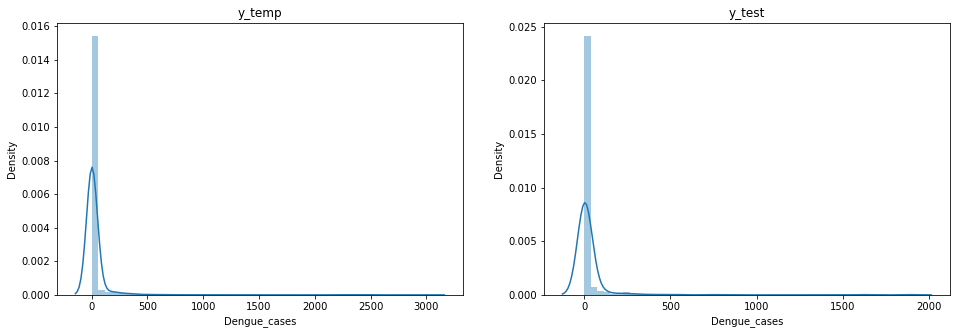

In [173]:
fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.distplot(y_temp, ax=axes[0])
axes[0].set_title("y_temp")
sns.distplot(y_test, ax=axes[1])
axes[1].set_title("y_test")

In [116]:
#split to train and dev

X_train, X_dev, y_train, y_dev = train_test_split(X_temp, y_temp, test_size=350, random_state = 123)

In [117]:
X_train.shape

(1220, 36)

In [118]:
train_dev_ks = ks_test(X_train, X_dev)
train_dev_ks

,variable,KS,p_value
0,week,0.031639,0.938649
1,city_dens,0.024028,0.996330
2,min_temp_t-2,0.045246,0.614121
3,DTR_t-2,0.059508,0.277460
4,sea_level_pressure_t-2,0.036534,0.845191
5,avg_humidity_t-2,0.068197,0.150983
6,Gust_t-2,0.039906,0.760968
7,DTR_t-4,0.040609,0.742149
8,BR_minT_t-4,0.016323,0.999999
9,rain_log_t-4,0.049508,0.499172


In [119]:
stats.ks_2samp(y_train, y_dev)

KstestResult(statistic=0.03641686182669789, pvalue=0.8478843295816898)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'y_dev')

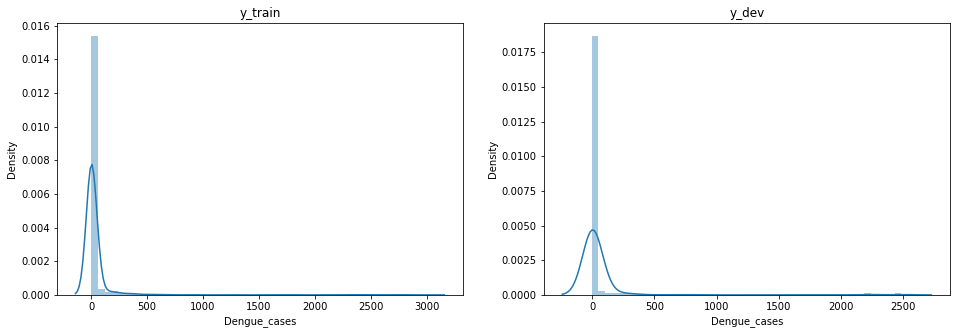

In [174]:
fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.distplot(y_train, ax=axes[0])
axes[0].set_title("y_train")
sns.distplot(y_dev, ax=axes[1])
axes[1].set_title("y_dev")

In [121]:
print("X_train",X_train.shape)
print("X_dev",X_dev.shape)
print("X_test",X_test.shape)

X_train (1220, 36)
X_dev (350, 36)
X_test (400, 36)


## Model selction

In [123]:
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [124]:
model_list = [LinearRegression(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(),
             SVR(), KNeighborsRegressor()]
model_names = ["LinearRegession", "Ridge", "Desion Tree", "RandomForest", "AdaBoost", "GradientBoosting", "SVR", "KNN"]
MSE_res = []
R2_res = []
MAE_res = []



for model in model_list:
    mod = model
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_dev)
    MSE = metrics.mean_squared_error(y_dev,y_pred)
    MAE = metrics.mean_absolute_error(y_dev,y_pred)
    r2 = metrics.r2_score(y_dev,y_pred)
    MSE_res.append(MSE)
    R2_res.append(r2)
    MAE_res.append(MAE)
        
res_df = pd.DataFrame({'Model': model_names, 'MSE': MSE_res, 'MAE': MAE_res, 'R2': R2_res}) 
    
res_df

,Model,MSE,MAE,R2
0,LinearRegession,62984.002337,85.214906,0.048822
1,Ridge,62456.704825,82.263769,0.056785
2,Desion Tree,60650.831429,50.002857,0.084057
3,RandomForest,62324.420005,64.844143,0.058783
4,AdaBoost,76209.052212,108.063612,-0.150902
5,GradientBoosting,77222.509266,68.338293,-0.166207
6,SVR,67523.255728,43.041984,-0.019730
7,KNN,60125.399314,53.768000,0.091992


In [125]:
res_df.sort_values("MSE")

,Model,MSE,MAE,R2
7,KNN,60125.399314,53.768000,0.091992
2,Desion Tree,60650.831429,50.002857,0.084057
3,RandomForest,62324.420005,64.844143,0.058783
1,Ridge,62456.704825,82.263769,0.056785
0,LinearRegession,62984.002337,85.214906,0.048822
6,SVR,67523.255728,43.041984,-0.019730
4,AdaBoost,76209.052212,108.063612,-0.150902
5,GradientBoosting,77222.509266,68.338293,-0.166207


### Hyperparameter Fine-Tuning

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
knn = KNeighborsRegressor()
n_neighbors = [3, 5, 7, 11, 20, 30] 
weights = ['uniform', 'distance']
algorithm = ['ball_tree', 'kd_tree', 'brute']
params = {'n_neighbors': n_neighbors, 'weights':weights, 'algorithm':algorithm}

In [128]:
knn_grid = GridSearchCV(estimator = knn, param_grid = params, n_jobs = -1, cv = 10, verbose = 2) #cv =10
knn_grid.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.4s finished


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 11, 20, 30],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [129]:
best_grid = knn_grid.best_estimator_
y_grid = knn_grid.predict(X_dev)
mse_score = metrics.mean_squared_error(y_dev,y_grid)
r2_score = metrics.r2_score(y_dev,y_grid)

In [130]:
print("Best parameters:",knn_grid.best_params_)
print("Mean Squared Error:", mse_score)
print("R2:", r2_score)

Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 30, 'weights': 'distance'}
Mean Squared Error: 55657.98903978628
R2: 0.15945851788135357


In [141]:
# second grid search
knn_2 = KNeighborsRegressor(weights = 'distance', algorithm = 'ball_tree')

n_neighbors = [20, 30, 40, 50]
leaf_size = [5, 10, 15, 20, 30, 40]
p = [1, 2]

params_2 =  {'n_neighbors': n_neighbors, 'leaf_size':leaf_size, 'p': p}

knn_grid2 = GridSearchCV(estimator = knn_2, param_grid = params_2, n_jobs = -1, cv = 10, verbose = 2) #cv =10
knn_grid2.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.7s finished


GridSearchCV(cv=10,
             estimator=KNeighborsRegressor(algorithm='ball_tree',
                                           weights='distance'),
             n_jobs=-1,
             param_grid={'leaf_size': [5, 10, 15, 20, 30, 40],
                         'n_neighbors': [20, 30, 40, 50], 'p': [1, 2]},
             verbose=2)

In [142]:
best_grid2 = knn_grid2.best_estimator_
y_grid2 = knn_grid2.predict(X_dev)
mse_score = metrics.mean_squared_error(y_dev,y_grid2)
r2_score = metrics.r2_score(y_dev,y_grid2)

In [143]:
print("Best parameters:",knn_grid2.best_params_)
print("Mean Squared Error:", mse_score)
print("R2:", r2_score)

Best parameters: {'leaf_size': 5, 'n_neighbors': 40, 'p': 1}
Mean Squared Error: 54822.41753995697
R2: 0.17207723657743457


Best modle: KNN n_neighbors = 40, weights = 'distance', algorithm= 'ball_tree', leaf_size'= 5, p = 1

In [144]:
import pickle

In [145]:
file1= "knn_model.pkl"
with open(file1, 'wb') as file:  
    pickle.dump(knn_grid2, file)

### Runing the model on the test subset

In [146]:

y_predict = knn_grid2.predict(X_test)

In [147]:
mse_test = metrics.mean_squared_error(y_test, y_predict)
r2_test = metrics.r2_score(y_test, y_predict)
print("Mean Squared Error:", mse_test)
print("R2:", r2_test)

Mean Squared Error: 17820.82281408474
R2: 0.0970441022688544


Text(0, 0.5, 'y_predict')

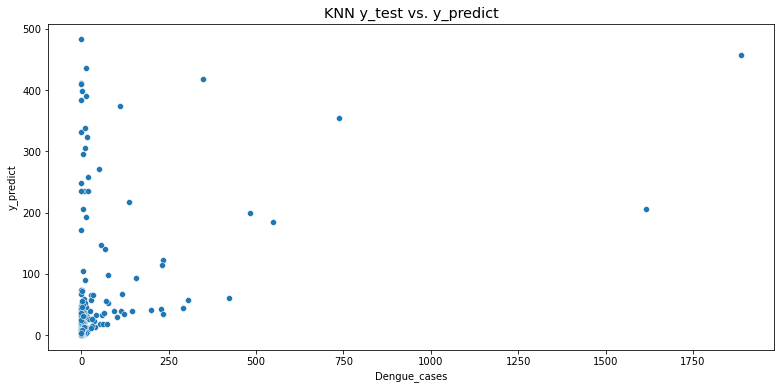

In [184]:
plt.figure(figsize=(13, 6))
sns.scatterplot(x= y_test, y=y_predict)
plt.title("KNN y_test vs. y_predict", fontsize =  'x-large')
plt.ylabel('y_predict')

Text(0, 0.5, 'y_dev_predict')

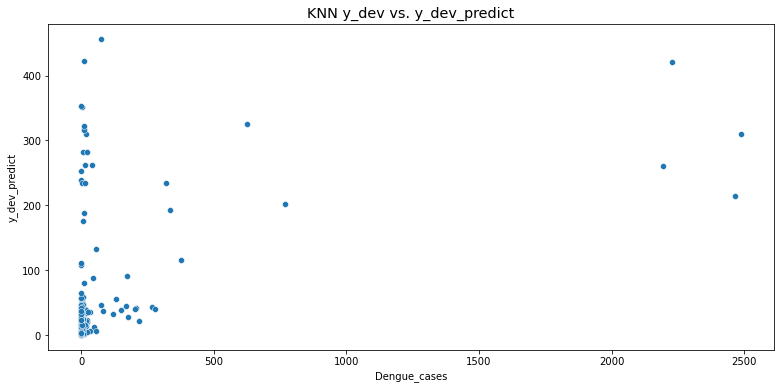

In [186]:
plt.figure(figsize=(13, 6))
sns.scatterplot(x= y_dev, y=y_grid2)
plt.title("KNN y_dev vs. y_dev_predict", fontsize =  'x-large')
plt.ylabel('y_dev_predict')

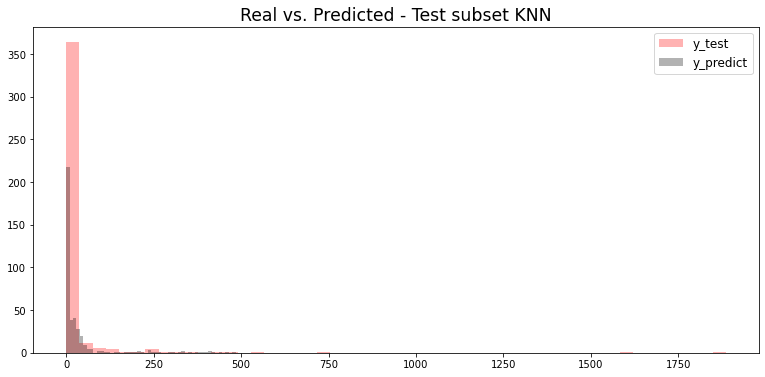

In [180]:
plt.figure(figsize=(13, 6))
plt.title("Real vs. Predicted - Test subset KNN", fontsize =  'xx-large')
plt.hist(y_test, alpha=0.3, color = 'red', bins =50)
plt.hist(y_predict, alpha=0.3, color = 'black',  bins =50)
plt.legend(("y_test", "y_predict"), loc='upper right', fontsize = 'large')

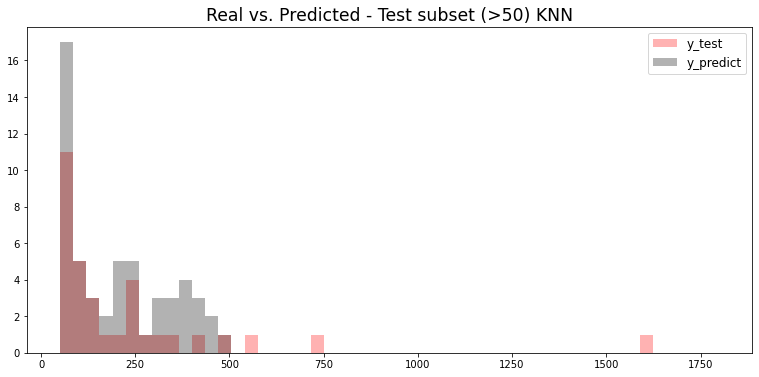

In [181]:
plt.figure(figsize=(13, 6))
plt.title("Real vs. Predicted - Test subset (>50) KNN", fontsize =  'xx-large')
plt.hist(y_test, alpha=0.3, color = 'red', range = (50, 1800),bins =50)
plt.hist( y_predict, alpha=0.3, color = 'black', range = (50, 1800), bins =50)
plt.legend(("y_test", "y_predict"), loc='upper right', fontsize = 'large')

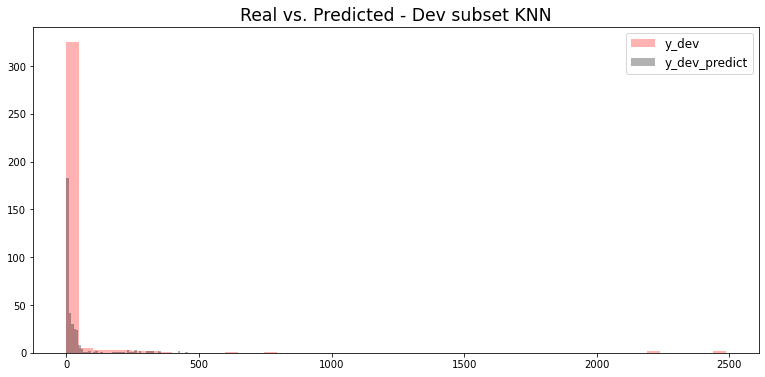

In [182]:
plt.figure(figsize=(13, 6))
plt.title("Real vs. Predicted - Dev subset KNN", fontsize =  'xx-large')
plt.hist(y_dev, alpha=0.3, color = 'red', bins =50)
plt.hist(y_grid2, alpha=0.3, color = 'black',  bins =50)
plt.legend(("y_dev", "y_dev_predict"), loc='upper right', fontsize = 'large')

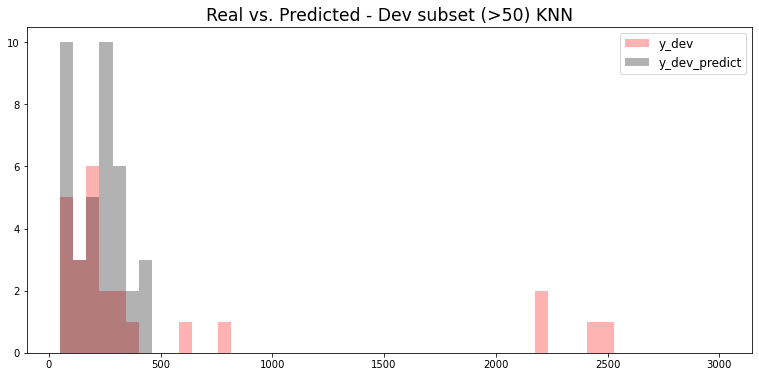

In [183]:
plt.figure(figsize=(13, 6))
plt.title("Real vs. Predicted - Dev subset (>50) KNN", fontsize =  'xx-large')
plt.hist(y_dev, alpha=0.3, color = 'red', bins =50,  range = (50, 3000))
plt.hist(y_grid2, alpha=0.3, color = 'black',  bins =50,  range = (50, 3000))
plt.legend(("y_dev", "y_dev_predict"), loc='upper right', fontsize = 'large')

(-5.0, 50.0)

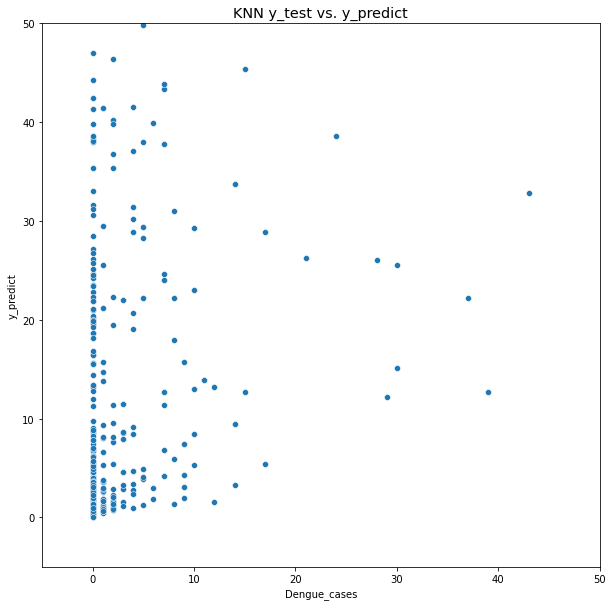

In [192]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x= y_test, y=y_predict, ax = ax)
plt.title("KNN y_test vs. y_predict", fontsize =  'x-large')
plt.ylabel('y_predict')
ax.set_xlim(-5,50)
ax.set_ylim(-5,50)